K-means clustering
----

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

Geneate some data with three clear clusters

In [23]:
cluster_means = [[0,0],[4,4],[-4,4]]
n_data = 20 # Number in each cluster
x = np.empty(shape=(0,2))
for i,m in enumerate(cluster_means):
    x = np.vstack((x,np.random.randn(n_data,2) + np.tile(m,(n_data,1))))

Plot the data

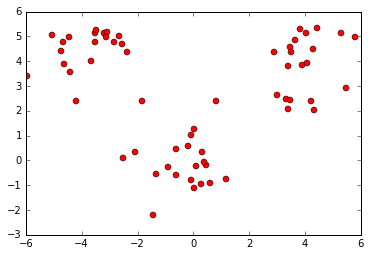

In [25]:
plt.figure()
plt.plot(x[:,0],x[:,1],'ro')

Run the k-means algorithm

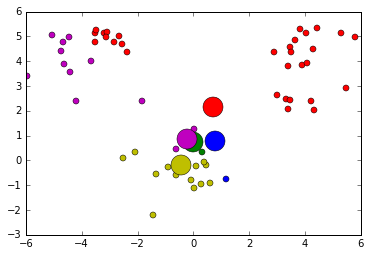

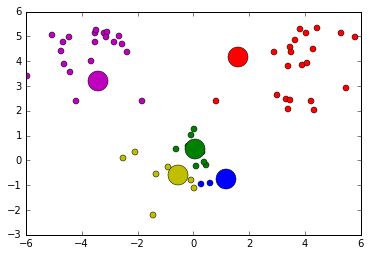

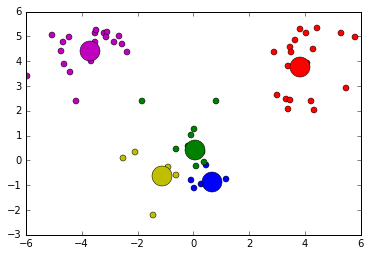

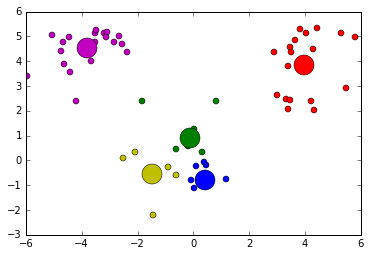

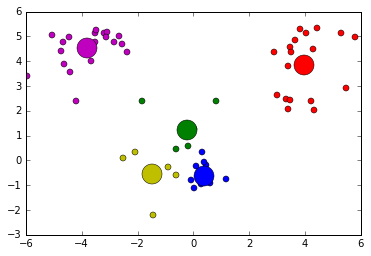

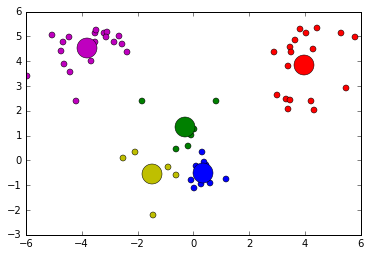

In [62]:
# set K
K = 3
# Initialise the means
mu = np.random.randn(K,2)
# Set maximum number of iterations
max_its = 100
N = len(x)
z = np.zeros((N,K))
oldz = np.ones((N,K)) # just to make sure it is different from z in iteration 1

# Colours for plotting - if you set K bigger than the 
# length of this, it'll crash
cols = ['ro','bo','go','yo','mo','ko']

for it in range(max_its):
    
    
    # Note that the following is slow and could be vectorised
    # Assigns each point to its closest mean
    # assignments are stored in z
    di = np.zeros(K)
    for n in range(N):
        for k in range(K):
            di[k] = ((x[n,:] - mu[k,:])**2).sum()
        pos = np.argmin(di)
        z[n,:] = 0
        z[n,pos] = 1
    
    # Plot the status of the algorithm
    # The data are coloured according to the memberships in z
    # and the means are plotted in the same colours with larger symbols
    plt.figure()
    for k in range(K):
        plt.plot(x[z[:,k]==1,0],x[z[:,k]==1,1],cols[k])
        plt.plot(mu[k,0],mu[k,1],cols[k],markersize=20)
    
    
    # Check if anything has changes
    changes = (np.abs(z - oldz)).sum()
    if changes == 0:
        break
    # Update the means
    for k in range(K):
        mu[k,:] = np.sum((x*(z[:,k][:,None])),axis=0)/z[:,k].sum()
        
    # Make a deep copy of z...
    oldz = np.copy(z)
    
    

array([[ 3.98261698,  3.85337711],
       [-0.28782054, -0.10508507],
       [-3.70671831,  4.4064479 ]])